# Results

In [ ]:
from helper import *

In [10]:
import numpy as np
import matplotlib
import pandas as pd
# import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from copy import deepcopy
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist, cifar10
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = x_train[0].squeeze()

In [2]:
from IPython.core.pylabtools import figsize
figsize(20, 6)

In [3]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif', size=20)
# matplotlib.rcParams['lines.linewidth'] = lw

# Augmentation
---

In [37]:
def rotate(x, aug):
    datagen = ImageDataGenerator()
    
    return datagen.apply_transform(x,{'theta':int(aug*360)})

def trans(x, aug):
    datagen = ImageDataGenerator()
    
    return datagen.apply_transform(x,{'ty':aug*28})

def swap():
    tmp_x = deepcopy(x)
    hw = x.shape[1] / 2

    tmp_x[:, :hw, -hw:] = x[:, -hw:, :hw]
    tmp_x[:, -hw:, :hw] = x[:, :hw, -hw:]
    
def noise(x,noise_level):
    noise = np.random.normal(scale=noise_level, size=x.shape)

    return x + noise

def edge_noise(x,noise_level):
    noise = np.random.normal(scale=noise_level, size=x.shape)
    noise[5:-5, 5:-5, :] = 0

    return x + noise

In [34]:
def show_aug(aug_fn):
    plt.clf()
    fig = plt.figure()

    gs = GridSpec(2, 7, figure=fig)
    for i, aug in enumerate([0., .1, .2, .3, .4, .5, .6, .7, .8, .9, .99]):
        x_trans = aug_fn(x[:,:,np.newaxis], aug).squeeze()
        if i == 0:
            ax = fig.add_subplot(gs[:, 0:2])
            ax.imshow(x); ax.axis('off'); 
        else:
            if i < 6: ax = fig.add_subplot(gs[0, i+1])
            else: ax = fig.add_subplot(gs[1, i-5+1])
            ax.imshow(x_trans); ax.axis('off'); 
        ax.set_title(str(100*aug) + '%')
    plt.show()

<Figure size 1440x432 with 0 Axes>

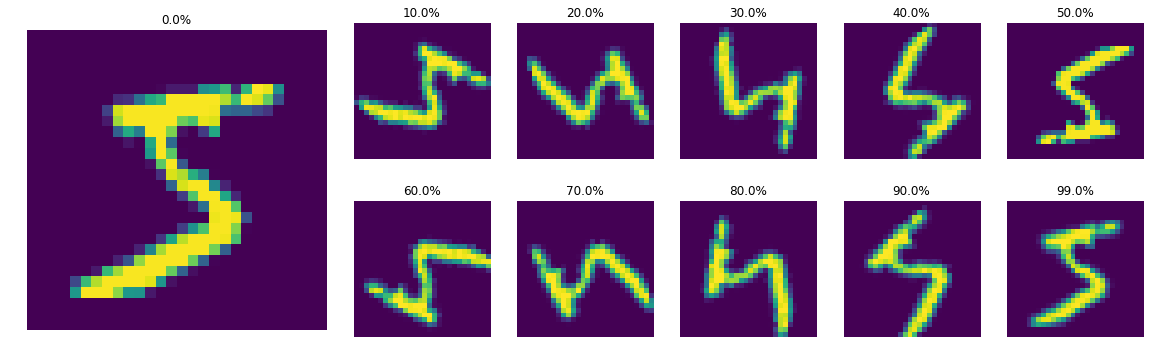

In [38]:
show_aug(rotate)

<Figure size 1440x432 with 0 Axes>

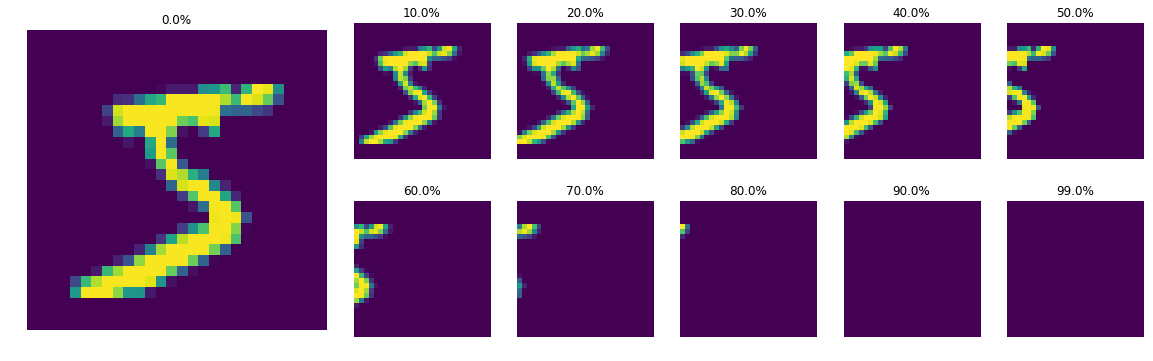

In [39]:
show_aug(trans)

<Figure size 1440x432 with 0 Axes>

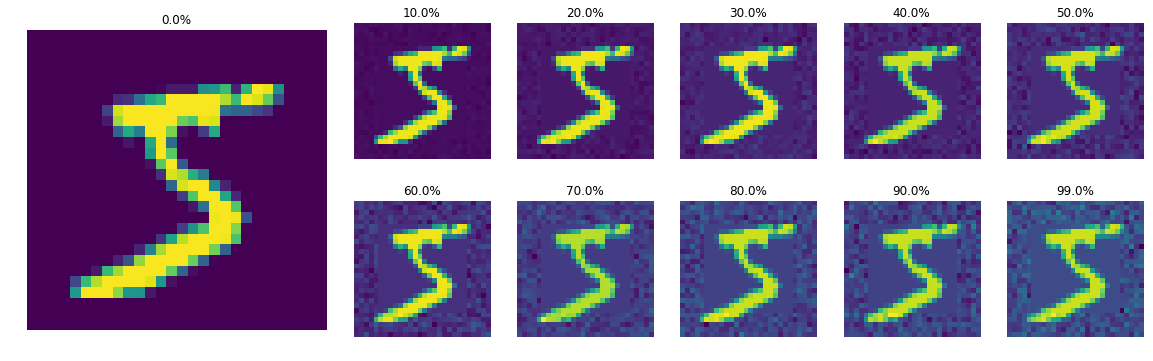

In [14]:
show_aug(edge_noise)

<Figure size 1440x432 with 0 Axes>

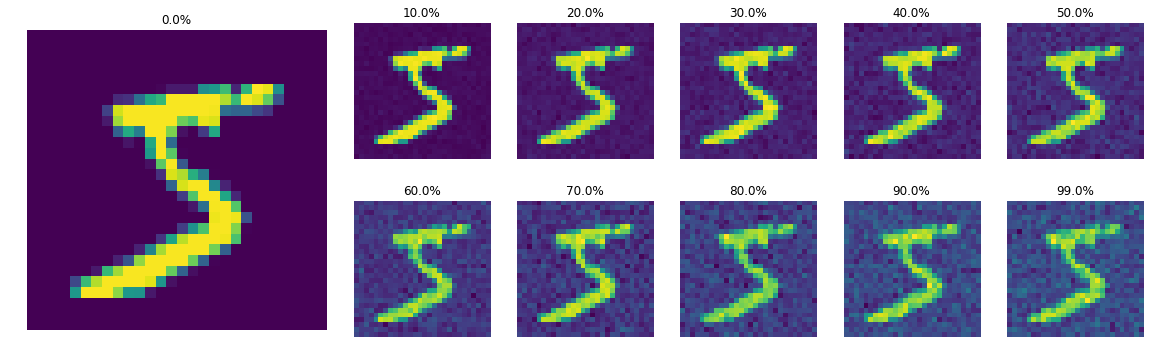

In [15]:
show_aug(noise)

# MNIST
---

In [ ]:
mnist_all = pd.read_csv('mnist.csv')
mnist = mnist_all[mnist_all['aug_type'] != 'vcp']

mnist_cnn = mnist[mnist['model'] == 'cnn'].reset_index()
mnist_fcn = mnist[mnist['model'] == 'fcn'].reset_index()
mnist_fcn_vcp = mnist_all[mnist_all['aug_type'] == 'vcp'].reset_index()

In [ ]:
convert_table(mnist, eval_type='translation', to_latex=False)

In [ ]:
convert_table_vcp(mnist_fcn_vcp)

# CIFAR
---

In [ ]:
cifar_all = pd.read_csv('cifar.csv').append(pd.read_csv('cifar_1.csv'), ignore_index=True)
cifar = cifar_all[cifar_all['aug_type'] != 'vcp']

cifar_cnn = cifar[cifar['model'] == 'cnn'].reset_index()
cifar_fcn = cifar[cifar['model'] == 'fcn'].reset_index()
cifar_fcn_vcp = cifar_all[cifar_all['aug_type'] == 'vcp'].reset_index()

In [ ]:
convert_table(cifar, eval_type='val_acc', to_latex=False)

In [ ]:
convert_table_vcp(cifar_fcn_vcp)

# Paper Figures
---
### 1. Translation (left: FCN; right: CNN)
    * Translation Augmented Training Acc
    * Un-Augmented Validation Acc
    * Translation Augmented Validation Acc

![](Figures/Paper/mnist.png)

![](Figures/Paper/cifar.png)

### 2. Approximate Weight Sharing (left: distance @ 1; right: distance @ 4)

### MNIST
![](Figures/Paper/approximate_ws_mnist.png)

### CIFAR
![](Figures/Paper/approximate_ws_cifar.png)

### 3. Swap (left: MNIST; right: CIFAR)

![](Figures/Paper/swap.png)

# Supplementary Material Figures
---
### 1. Augmentation Type 
    * (left: aug_type training, right: un-augmented val acc)
    * (left: translation val, right: rotation val)
    * (left: noise val, right: edge noise val)
    * swap val

### MNIST
---
| CNN | FCN |
------|-----
|  ![](Figures/SM/cnn_edge_noise_mnist.png)  |  ![](Figures/SM/fcn_edge_noise_mnist.png)   |
| ![](Figures/SM/cnn_noise_mnist.png)        | ![](Figures/SM/fcn_noise_mnist.png) |
| ![](Figures/SM/cnn_rotation_mnist.png)     | ![](Figures/SM/fcn_rotation_mnist.png) |




### CIFAR
---
| CNN | FCN |
------|-----
|  ![](Figures/SM/cnn_edge_noise_cifar.png)  |  ![](Figures/SM/fcn_edge_noise_cifar.png)   |
| ![](Figures/SM/cnn_noise_cifar.png)        | ![](Figures/SM/fcn_noise_cifar.png) |
| ![](Figures/SM/cnn_rotation_cifar.png)     | ![](Figures/SM/fcn_rotation_cifar.png) |


### 2. Variable Connection Pattersn

![](Figures/SM/fcn_vcp_mnist.png)
---

![](Figures/SM/fcn_vcp_cifar.png)